# **MACHINE LEARNING CLASSIFICATION**
# **TELCO CUSTOMER CHURN**
Anggota Kelompok:
1. Khalila Nuraini Putri   23051130006
2. Alif Januar Rizky       23051130015
3. Anas Ridhwanul Dahlan   23051130050

# Business Problem Understanding

**Context**

Perusahaan telekomunikasi menghadapi masalah customer churn, yaitu pelanggan yang berhenti berlangganan layanan. Churn memberi dampak langsung pada pendapatan, sehingga perusahaan perlu mampu mengetahui pelanggan mana yang berpotensi churn lebih awal. Dengan memanfaatkan data pelanggan (tenure, jenis layanan, biaya bulanan, kontrak, dll), kita dapat membangun model klasifikasi untuk memprediksi churn sehingga perusahaan dapat:
* Melakukan strategi retensi yang lebih baik
* Mengurangi biaya akuisisi pelanggan baru
* Meningkatkan loyalitas dan keuntungan

Target

1 : Berhenti berlangganan layanan (Churn)

0 : Loyal



**Problem Statement**

* Faktor apa saja yang berkontribusi pada churn pelanggan?
* Bagaimana cara membuat model yang dapat memprediksi apakah seorang pelanggan akan churn?
* Metode resampling apa yang memberikan performa terbaik untuk data yang tidak seimbang?

**Goals**
* Melakukan eksplorasi data untuk memahami distribusi fitur dan target.
* Menangani data tidak seimbang menggunakan beberapa metode resampling.
* Membandingkan beberapa model klasifikasi untuk memilih kandidat terbaik.
* Mengevaluasi model berdasarkan metrik Recall (kelas 1) karena kesalahan memprediksi pelanggan churn lebih berbahaya dibanding sebaliknya.

**Analytics Approach**
* Data cleaning
* Exploratory Data Analysis (EDA)
* Feature preprocessing
* Baseline modeling (tanpa resampling)
* Resampling (ADASYN, SMOTE, Random Oversampling)
* Modeling ulang & evaluasi

**Evaluation Metric**
* Recall kelas 1 (Churn)
* F1-Score
* Confusion matrix
* Akurasi sebagai tambahan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from IPython.display import display
pd.set_option('display.max_columns', None)

# Exploratory Data Analysis (EDA)

 Exploratory Data Analysis (EDA) bertujuan memahami karakteristik data sebelum dilakukan tahap preprocessing dan modeling. Dengan melakukan EDA, dapat mengidentifikasi pola, menemukan anomali, memahami distribusi variabel, serta melihat hubungan antar fitur yang berpotensi memengaruhi hasil model.

 Pada tahapan ini, beberapa langkah eksplorasi dilakukan untuk membaca struktur dataset, memeriksa jumlah data, melihat tipe variabel, serta memahami nilai-nilai statistik dasar seperti mean, median, dan distribusi frekuensi. Langkah ini sangat penting untuk memastikan bahwa dataset yang akan digunakan sudah sesuai untuk kebutuhan analisis dan model yang akan dibangun.

 Selain itu, EDA juga membantu mengidentifikasi permasalahan yang mungkin ada pada dataset, seperti:
* Missing values (nilai yang hilang)

* Outliers (nilai ekstrem)

* Ketidakseimbangan label pada target variable

* Korelasi antar fitur yang terlalu tinggi (multicollinearity)

* Distribusi fitur kategorikal dan numerikal

Dengan memahami kondisi tersebut,  dapat menentukan strategi preprocessing yang tepat untuk meningkatkan performa model.

In [4]:
df = pd.read_csv('data_telco_customer_churn.csv')
df.head(10)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
5,Yes,40,No,No,DSL,Yes,No,Month-to-month,Yes,74.55,No
6,No,17,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.70,No
7,No,11,No,No,DSL,No,No,Month-to-month,Yes,44.05,Yes
8,No,8,No,No,Fiber optic,No,No,Month-to-month,Yes,73.50,No
9,Yes,47,Yes,No,DSL,Yes,Yes,One year,No,40.30,No


In [5]:
print(df.columns)

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [7]:
df.duplicated().sum()

np.int64(77)

In [8]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [9]:
listItem = []
for col in df.columns:
    uniq = df[col].drop_duplicates().values
    n_show = min(3, len(uniq))
    samples = list(pd.Series(uniq).sample(n=n_show, replace=False, random_state=0).values)
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        round((df[col].isna().sum()/len(df[col])) * 100, 2),
        df[col].nunique(),
        samples
    ])

dfDesc = pd.DataFrame(columns=['dataFeatures','dataType','null','nullPct','unique','uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,73,"[65, 41, 15]"
2,OnlineSecurity,object,0,0.0,3,"[No internet service, Yes, No]"
3,OnlineBackup,object,0,0.0,3,"[No internet service, Yes, No]"
4,InternetService,object,0,0.0,3,"[No, Fiber optic, DSL]"
5,DeviceProtection,object,0,0.0,3,"[No, No internet service, Yes]"
6,TechSupport,object,0,0.0,3,"[No internet service, No, Yes]"
7,Contract,object,0,0.0,3,"[One year, Two year, Month-to-month]"
8,PaperlessBilling,object,0,0.0,2,"[No, Yes]"
9,MonthlyCharges,float64,0,0.0,1422,"[71.35, 88.15, 25.8]"


In [10]:
print(df['Churn'].value_counts(normalize= True))

Churn
No     0.733063
Yes    0.266937
Name: proportion, dtype: float64


In [11]:
print(df['Churn'].value_counts())

Churn
No     3614
Yes    1316
Name: count, dtype: int64


Hasil dari persentase antara "Yes" dan "No" pada kolom Churn menunjukkan bahwa dataset imbalanced. Perlu dilakukan sebuah metode untuk mengatasi ini supaya model tidak malas belajar.



**Deteksi Outlier**

Distribusi nilai pada fitur numerik divisualisasikan untuk memeriksa potensi outlier. Hasilnya:
      * tenure dan MonthlyCharges memiliki distribusi yang wajar,
      * tidak ada outlier ekstrem yang memerlukan penghapusan,
      * variasi nilai mencerminkan perilaku pelanggan nyata.

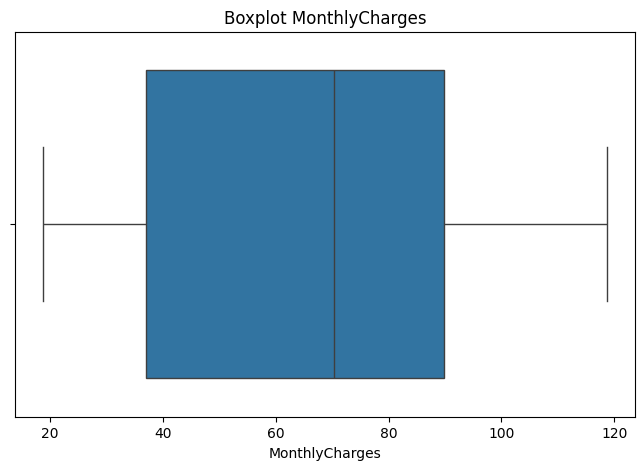

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['MonthlyCharges'])
plt.title("Boxplot MonthlyCharges")
plt.show()

- Tidak ditemukan outlier
- Distribusi berada pada rentang 20-120 dengan media sekitar $70
- Variasi tagihan cukup lebar, yang berpotensi memengaruhi perilaku churn


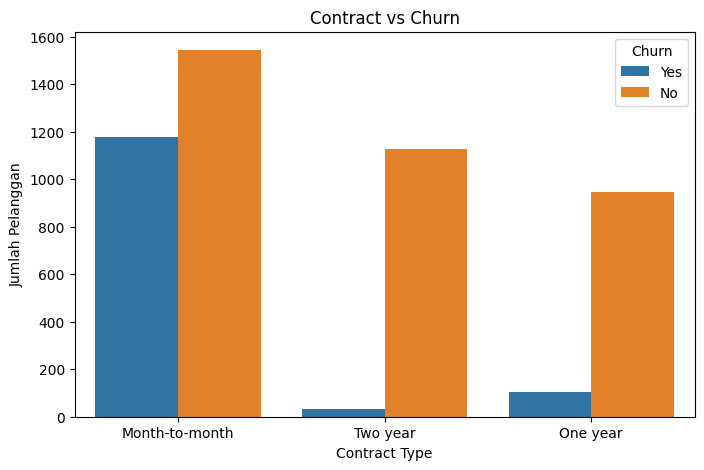

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Jumlah Pelanggan')
plt.show()


Countplot ini menunjukkan hubungan antara jenis kontrak pelanggan dan status churn.

Pelanggan dengan kontrak month-to-month memiliki jumlah churn paling tinggi dibandingkan jenis kontrak lainnya.

Kontrak jangka panjang (One year dan Two year) menunjukkan:

- jumlah pelanggan yang churn jauh lebih rendah

- mayoritas pelanggan tetap tidak churn

Hal ini mengindikasikan bahwa durasi kontrak berpengaruh terhadap loyalitas pelanggan,
di mana kontrak jangka panjang cenderung meningkatkan retensi.

Hasil ini menunjukkan bahwa pelanggan tanpa kontrak jangka panjang lebih berisiko churn


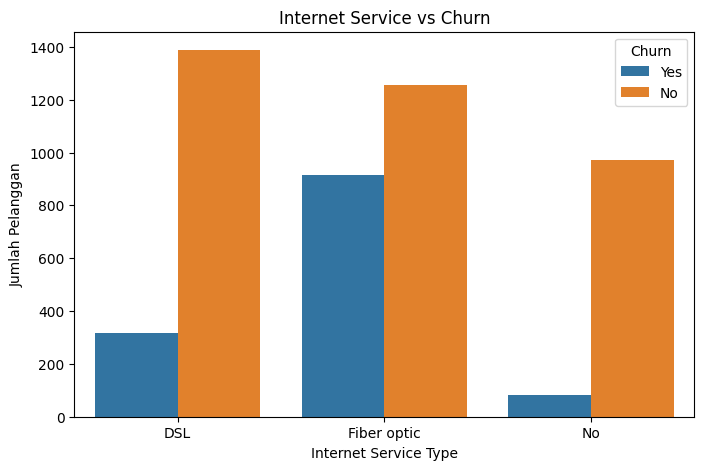

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Internet Service vs Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Jumlah Pelanggan')
plt.show()


Countplot ini memperlihatkan hubungan antara jenis layanan internet dan status churn pelanggan.

Pelanggan dengan layanan Fiber optic menunjukkan jumlah churn tertinggi dibandingkan jenis layanan lain.

Layanan DSL memiliki churn yang lebih rendah dibandingkan Fiber optic.

Pelanggan dengan kategori No Internet Service relatif memiliki jumlah churn paling sedikit,
yang mengindikasikan tingkat stabilitas pelanggan yang lebih tinggi.

Pola ini mengindikasikan bahwa jenis layanan internet berkorelasi dengan churn,
kemungkinan dipengaruhi oleh faktor seperti:

- kualitas layanan

- harga

- ekspektasi pelanggan terhadap layanan internet berkecepatan tinggi

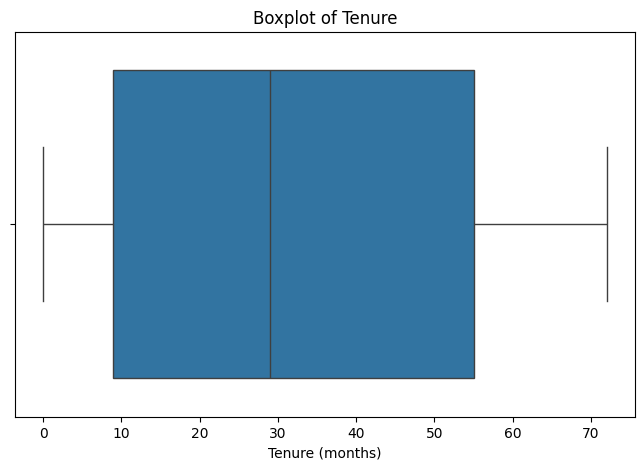

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['tenure'])
plt.title('Boxplot of Tenure')
plt.xlabel('Tenure (months)')
plt.show()

- Tidak ditemukan outlier
- Tenure berada pada rentang 0-72 bulan dengan median sekitar 30 bulan
- Banyak pelanggan berada pada tenure rendah (baru berlangganan), dan kelompok ini biasanya berisiko churn lebih tinggi

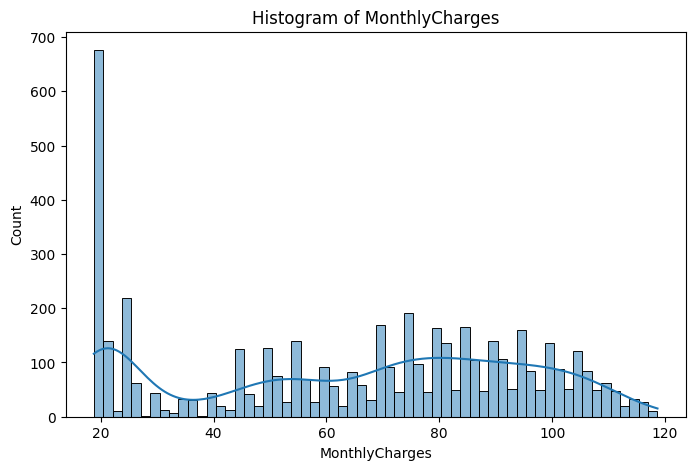

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyCharges'], bins=60, kde=True)
plt.title("Histogram of MonthlyCharges")
plt.show()


- Distribusi tidak merata dan memiliki beberapa puncak
- Banyak pelanggan dengan biaya sangat rendah (~20)
- Sebagian besar pelanggan berada pada rentang biaya sedang hingga tinggi
- Tidak ada outlier, data bersih
- Distribusi ini mencerminkan adanya segmentasi paket layanan yang beragam

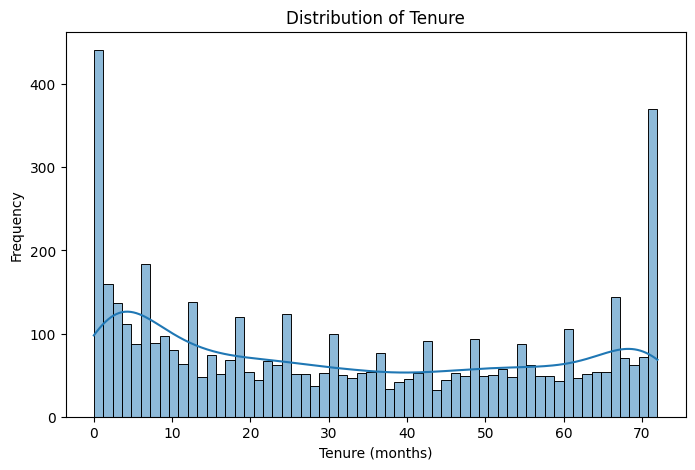

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['tenure'], bins=60, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

- Distribusi berbentuk U, menunjukkan dua kelompok dominan: pelanggan baru dan pelanggan lama
- Banyak pelanggan baru yang biasanya berisiko churn tinggi
- Banyak pelanggan lama (70+ bulan) yang cenderung loyal
- Tenure di tengah relatif sedikit, menunjukkan pelanggan yang tidak puas cenderung churn sebelum mencapai masa berlangganan menengah

## kesimpulan

Note:
- Dataset berisi 4930 pelanggan dan 11 fitur.
Mayoritas fitur bersifat kategorikal dan beberapa di antaranya memiliki lebih dari dua kategori.
- Tidak ada nilai kosong (missing value) di seluruh kolom
- Dataset tidak seimbang karena proporsi pelanggan yang "Churn" hanya 26,7%
- Setiap baris data mewakili satu pelanggan layanan telekomunikasi beserta informasi terkait layanan yang digunakan.

# Cleaning Data

  Tahapan cleaning data ini untuk memastikan bahwa data dalam kondisi bersih dan layak untuk pemodelan

1.   Verifikasi ulang missing values  
    Visualisasi missing data dibuat untuk memastikan tidak ada kolom yang memiliki nilai kosong dan untuk memahami pola ketidakseimbangan data apabila

2.   Menghapus data duplikat  
    Dilakukan penghapusan untuk:
      * menghindari bias dalam model,
      * mengurangi redundansi,
      * meningkatkan kualitas data.

3.  Membersihkan spasi pada teks  
    Seluruh kolom kategorikal dibersihkan dari spasi yang tidak diperlukan, terutama di awal atau akhir teks. Langkah kecil ini sangat penting karena perbedaan seperti "Yes" dan "Yes " dapat dianggap kategori berbeda oleh model.


<Axes: >

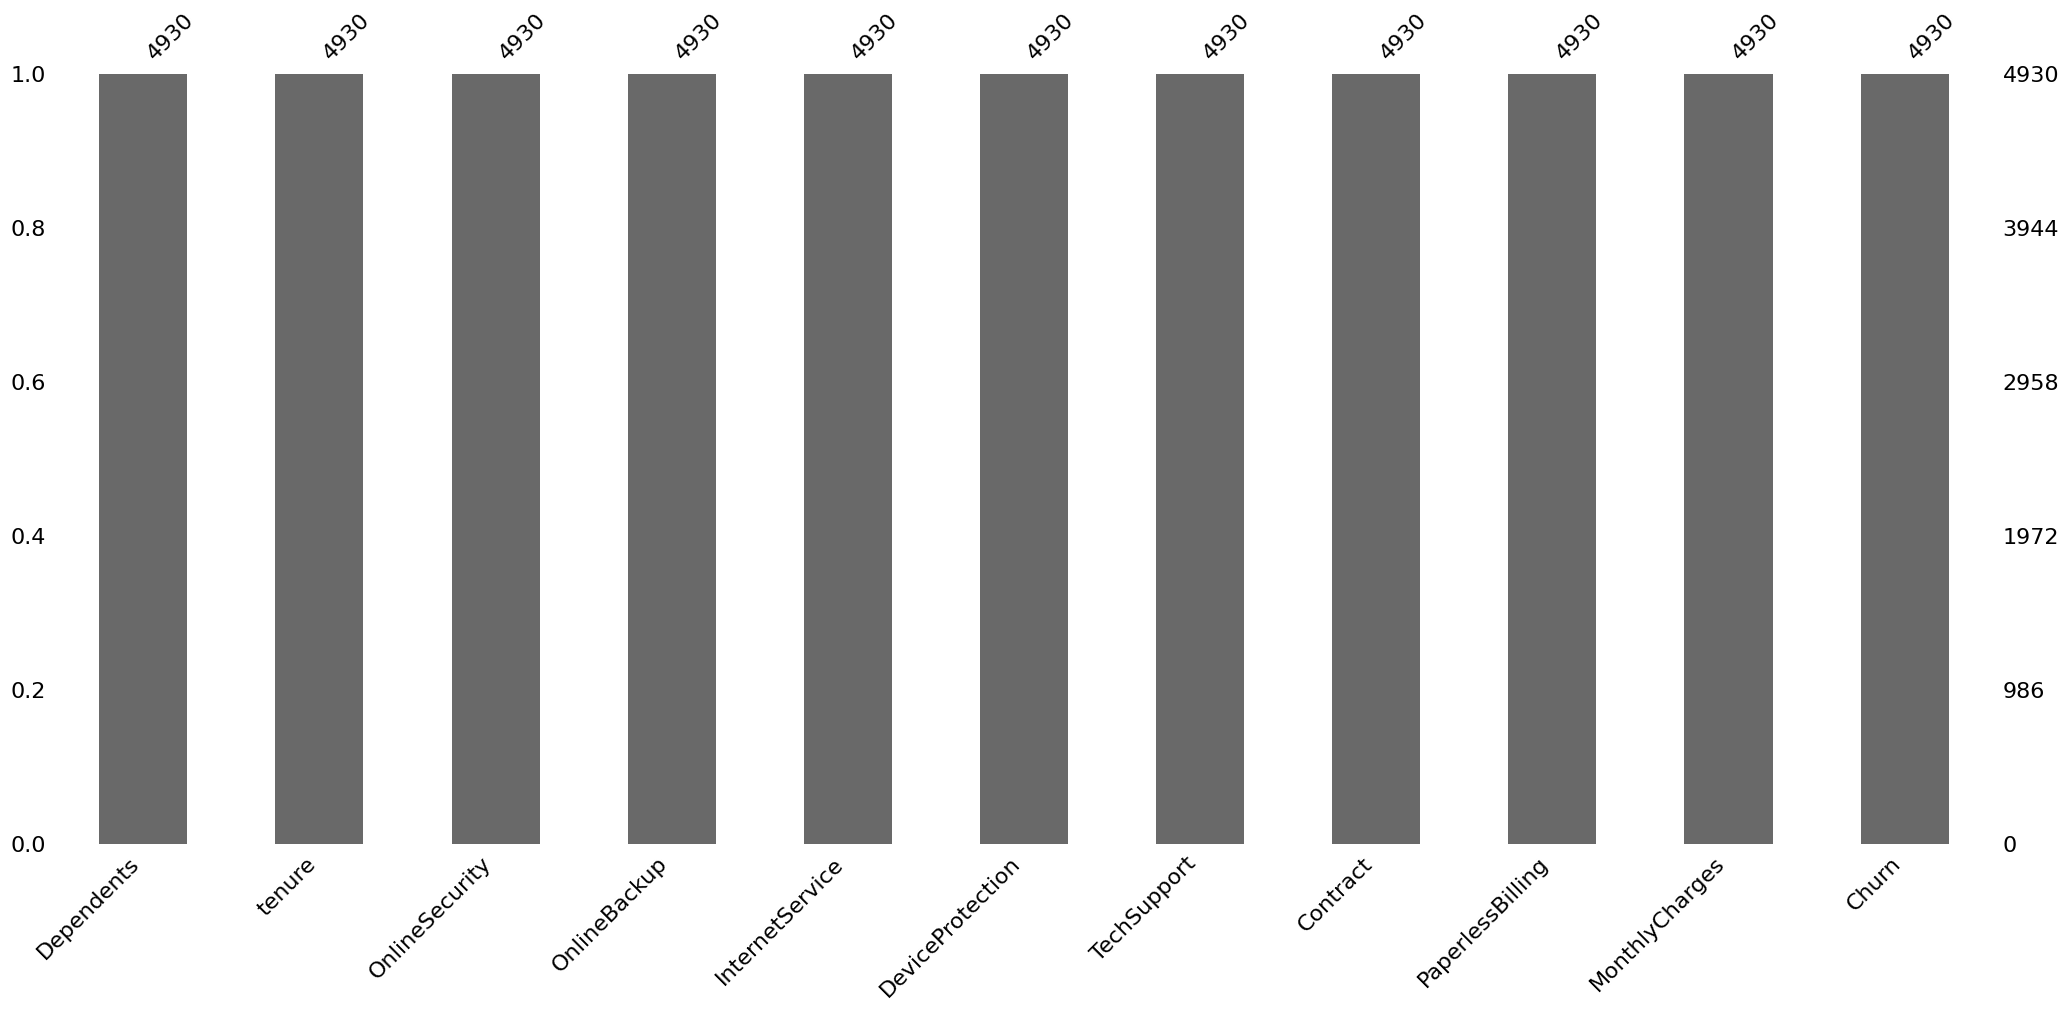

In [18]:
msno.bar(df)

Hasil menunjukkan tidak ada missing value pada semua kolom

<Axes: >

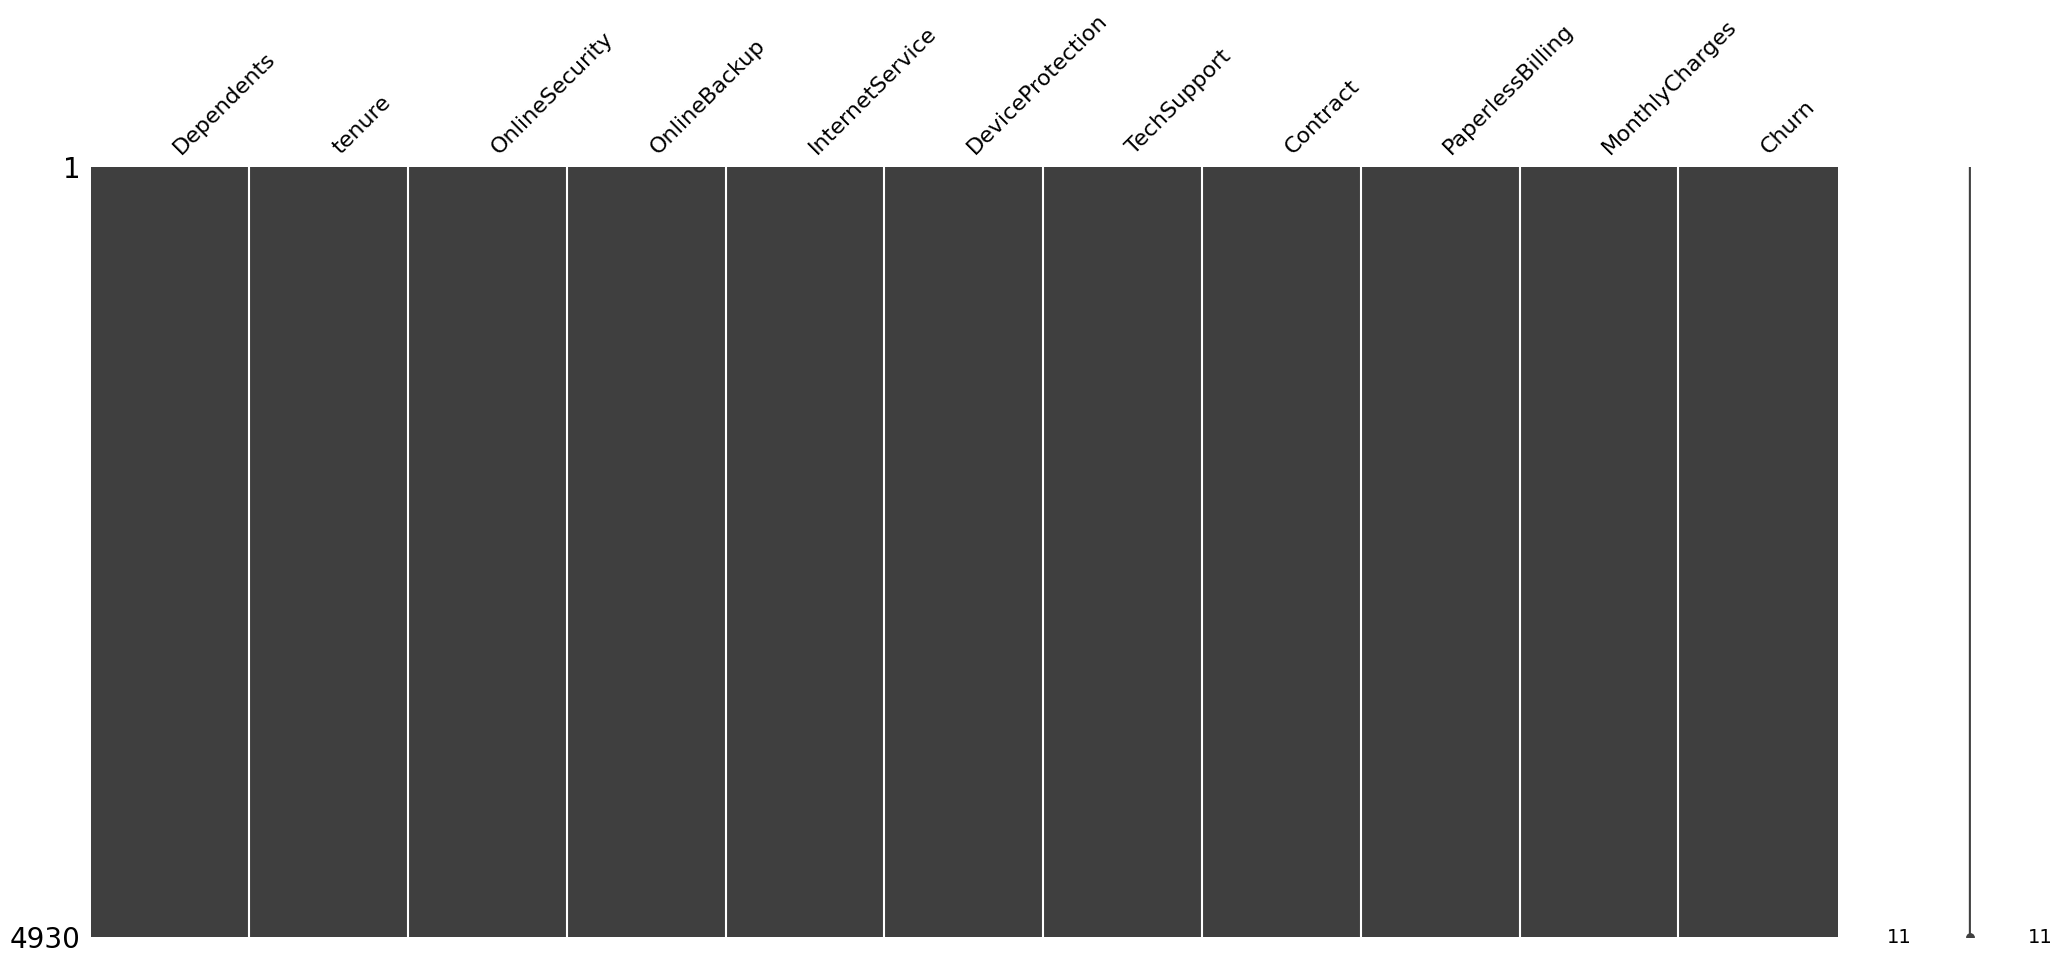

In [19]:
msno.matrix(df)

In [20]:
df.duplicated().sum()

np.int64(77)

Terdapat 77 baris yang merupakan duplikast.

In [21]:
df = df.drop_duplicates()
print(df.shape)

(4853, 11)


Menghapus baris duplikat. Ada pengurangan jumlah baris.

In [22]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()

Membersihkan spasi di fitur kategorikal untuk mengatasi masalah hidden whitespace.

# Feature Engineering


Tahap Feature Engineering dilakukan untuk menyiapkan data agar dapat diproses oleh algoritma machine learning secara optimal. Pada tahapan ini melakukan beberapa langkah: memilih fitur yang digunakan, memisahkan target, membagi dataset, serta menentukan fitur numerik dan kategorikal untuk proses transformasi.

1. Memisahkan Fitur (X) dan Target (y)  
  Dataset dipisahkan menjadi dua bagian utama:
      - X (features) berisi seluruh kolom kecuali kolom Churn.
      - y (target) berisi nilai Churn yang dikonversi dari label teks (“Yes”, “No”) menjadi bentuk numerik biner (1 = Churn, 0 = Tidak Churn).

Konversi ke bentuk biner sangat penting karena sebagian besar algoritma machine learning memerlukan target dalam format numerik, terutama untuk kasus klasifikasi dua kelas.

2. Membagi data

3. Menentukan fitur
      - Tenure: Lama pelanggan berlangganan
      - MonthlyCharges: Biaya bulanan yang dikenakan

In [23]:
# Memisah fitur (X) dan target (y)
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Memisah data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_test.value_counts())

Churn
0    706
1    265
Name: count, dtype: int64


In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['tenure', 'MonthlyCharges']

# Semua kolom kategorikal (termasuk yang biner dan yang multi)
categorical_features = ['Dependents', 'OnlineSecurity', 'OnlineBackup',
                        'InternetService', 'DeviceProtection', 'TechSupport',
                        'Contract', 'PaperlessBilling']

**StandarScaler dan OneHotEncoder**

Scalling pada kolom numerik (tenure dan MonthlyCharges) dan OneHotEncoder pada semua kolom kategori

* **StandarScaler**   
  Fitur tenure dan MonthlyCharges memiliki rentang nilai yang berbeda, sehingga perlu dilakukan normalisasi menggunakan StandardScaler.

  Alasan penggunaan scaling:
  1. Mengurangi bias model terhadap fitur dengan rentang nilai besar
  2. Membantu algoritma yang sensitif terhadap skala (Logistic Regression, KNN, SVM)
  3. Mempercepat proses training

* **OneHotEncoder**   
  Fitur kategorikal yang ditentukan sebelumnya dikonversi menggunakan OneHotEncoder. Encoder ini mengubah setiap kategori menjadi kolom biner (0/1).

  Alasan penggunaan encoding ini:
  1. Model machine learning hanya dapat membaca nilai numerik
  2. Menghindari interpretasi salah jika kategori dikodekan sebagai angka biasa
  3. Menangani kategori multi-class secara aman dan terstruktur

In [25]:
# FIT preprocessor pada X_train
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

preprocessor.fit(X_train)

# TRANSFORM X_train
X_train_preprocessed = preprocessor.transform(X_train)

# TRANSFORM X_test
X_test_preprocessed = preprocessor.transform(X_test)

# Baseline Modeling

**1. Komponen Modelling**

* StratifiedKFold. Digunakan untuk teknik validasi silang (cross-validation) yang menjaga proporsi kelas target tetap seimbang di setiap fold.

  Fungsi:
  * Membagi data menjadi beberapa bagian (fold) untuk pelatihan dan pengujian
  * Menjaga distribusi kelas agar tidak timpang
  * Sangat penting jika dataset tidak seimbang (imbalanced)

  Manfaat:
  * Menghasilkan evaluasi model yang lebih adil dan representatif

* cross_val_score. Digunakan untuk menguji performa model menggunakan cross-validation.

  Fungsi:
  * Melatih model beberapa kali pada subset data yang berbeda
  * Menghasilkan skor performa rata-rata
  * Membantu membandingkan beberapa model secara objektif

* Pipeline. Digunakan untuk menggabungkan preprocessing dan model dalam satu alur kerja.

  Manfaat:
  * Memastikan proses preprocessing dan pelatihan selalu konsisten
  * Mencegah kesalahan seperti data leakage
  * Memudahkan eksperimen dengan berbagai model

**2. Model Klasifikasi**

* Logistic Regression   
  Model linear untuk klasifikasi biner.
  * Cocok untuk baseline
  * Mudah diinterpretasikan
  * Cepat dan efisien

In [26]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

# Impor semua model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Impor metrik
from sklearn.metrics import classification_report, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

###**Inisialisasi semua model klasifikasi**



Tahapan inisialisasi model merupakan proses menyiapkan berbagai algoritma machine learning yang akan diuji pada data. Tujuannya adalah untuk membandingkan performa beberapa model sehingga dapat dipilih algoritma terbaik untuk memprediksi churn pelanggan.

In [27]:
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
lgbm = lgb.LGBMClassifier(random_state=42)

models = [logreg, knn, dt, rf, xgb, lgbm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

In [28]:
cv_mean_scores = []
cv_std_scores = []

# cross-validation
print("Memulai Cross-Validation (fokus pada 'Recall' Kelas 1)...")

for model in models:
    estimator = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')

    cv_mean_scores.append(model_cv.mean())
    cv_std_scores.append(model_cv.std())

print("Cross-Validation Selesai.")

#  hasil CV
cv_results = pd.DataFrame({
    'model': model_names,
    'mean_recall': cv_mean_scores,
    'sdev': cv_std_scores
})

print("\n--- Hasil Cross-Validation (Urut berdasarkan Mean Recall) ---")
print(cv_results.sort_values(by='mean_recall', ascending=False).to_markdown(index=False))

Memulai Cross-Validation (fokus pada 'Recall' Kelas 1)...
[LightGBM] [Info] Number of positive: 818, number of negative: 2287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 3105, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263446 -> initscore=-1.028134
[LightGBM] [Info] Start training from score -1.028134
[LightGBM] [Info] Number of positive: 818, number of negative: 2287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 3105

Logistic Regression paling baik dalam menangkap pelanggan yang akan churn pada data training

In [29]:
final_scores = []
model_names = []

print("\n--- Laporan Klasifikasi untuk Setiap Model pada Data Uji ---")

for model, name in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']):

    # pipeline lengkap
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    # Prediksi
    y_pred = pipeline.predict(X_test)

    # Hitung Recall (Kelas 1)
    recall_kelas_1 = recall_score(y_test, y_pred) # Fokus pada kelas 1

    final_scores.append(recall_kelas_1)
    model_names.append(name)

    print(f"===================== {name} =====================")
    print(classification_report(y_test, y_pred))
    print("\n")

# Rangkuman
final_results = pd.DataFrame({
    'model': model_names,
    'test_set_recall_kelas_1': final_scores
})

print("\n--- Rangkuman Skor Recall (Kelas 1) pada Data Uji ---")
print(final_results.sort_values(by='test_set_recall_kelas_1', ascending=False).to_markdown(index=False))


--- Laporan Klasifikasi untuk Setiap Model pada Data Uji ---
===================== Logistic Regression =====================
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       706
           1       0.66      0.49      0.56       265

    accuracy                           0.79       971
   macro avg       0.74      0.70      0.71       971
weighted avg       0.78      0.79      0.78       971



===================== KNN =====================
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       706
           1       0.61      0.45      0.52       265

    accuracy                           0.77       971
   macro avg       0.71      0.67      0.68       971
weighted avg       0.76      0.77      0.76       971



===================== Decision Tree =====================
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       706
 

## Interpretasi Hasil Baseline 6 Model

Eksperimen "Baseline Modeling" ini bertujuan untuk menguji 6 algoritma populer pada data mentah (sebelum *resampling*) untuk melihat potensi awal mereka.

Hasil dari *Cross-Validation* (estimasi performa) dan *Test Set* (hasil akhir) memberikan satu kesimpulan yang sangat jelas:

### 1. Masalah: Data Tidak Seimbang (Imbalanced)

Pada dataset, ada:
- No  : 3614 'Tidak Churn'
- Yes : 1316 'Churn'

Pada data train, ada:
- No   : 706 'Tidak Churn'
- Yes  : 265 'Churn'

Hasil ini adalah **bukti konklusif** bahwa masalah ada pada **data yang tidak seimbang**.

Apabila dataset imbalance ini digunakan, maka akan menghasilkan model dengan:
* **Recall Sangat Rendah:** Lihat pada tabel hasil *Test Set*, `test_set_recall_kelas_1` (fokus utama) untuk semua model sangatlah buruk. Model terbaik, `LightGBM`, hanya mencapai **0.50 (50%)**.
* **Artinya:** Model "canggih" seperti `LightGBM` dan `XGBoost`, ketika dilatih pada data asli, **gagal mendeteksi setengah** dari semua pelanggan yang akan *Churn*.
* **Kesimpulan:** Ini membuktikan bahwa langkah *resampling* **diperlukan** untuk mengharapkan hasil yang lebih baik dan akurat.

---

### 2. Alasan Memilih Logistic Regression dan LightGBM?

Tujuan dari *baseline test* ini bukan untuk menemukan model final, tetapi untuk **menyaring kandidat** model yang menunjukkan "potensi" terbesar.

Berdasarkan kedua tabel hasil, `Logistic Regression` dan `LightGBM` secara konsisten berada di **dua posisi teratas**.

* **Logistic Regression (Model Linear)**
    * Pada **Cross-Validation** (tabel 2) menghasilkan `mean_recall` 0.523.
    * Model sederhana dan linear `LogisticRegression` adalah yang paling stabil dan memiliki potensi terbaik.

* **LightGBM (Model Non-Linear)**
    * Pada **evaluasi Test Set** (tabel 1) menghasilkan `recall` 0.505.
    * `LightGBM` adalah model berbasis pohon yang sangat canggih (seperti `RandomForest` tetapi lebih modern). Model ini menghasilkan `recall` yang paling baik dari 6 model sebelumnya bahkan saat datanya tidak **seimbang**
    * Ini menunjukkan `LightGBM` memiliki **potensi "plafon" (ceiling) yang sangat tinggi** untuk mempelajari pola-pola kompleks yang mungkin tidak bisa ditangkap oleh `LogisticRegression`.

---

### 3. Kesimpulan

Dari hasil di atas, maka dari 6 model dipilih  2 "finalis" model untuk diuji dengan resampling:

1.  **`LogisticRegression`**: Model linear terbaik.
2.  **`LightGBM`**: Model non-linear dengan potensi tertinggi.

# Handling Imbalanced Data (Resampling) & Modeling
Resampling adalah sekumpulan teknik untuk mengubah komposisi data latih (train data) untuk mengatasi masalah data yang tidak seimbang (imbalanced dataset).

## Oversumpling dengan metode ADASYN

Oversampling digunakan untuk:
  * Menambah jumlah data pada kelas minoritas (Churn = 1)
  * Membuat distribusi kelas lebih seimbang
  * Meningkatkan kemampuan model dalam mengenali pola churn

`ADASYN` adalah metode oversampling adaptif yang fokus pada data minoritas yang paling sulit dipelajari oleh model. `ADASYN` digunakan untuk:
1. Mengidentifikasi titik data churn yang berada di area sulit (dekat kelas mayoritas),
2. Memberikan lebih banyak data sintetis di area tersebut,
3. Membantu model belajar pada wilayah keputusan yang kompleks.

Karakteristik `ADASYN`:
1. Lebih agresif dalam menambah data pada area rawan kesalahan klasifikasi
2. Fokus pada hard-to-learn samples
3. Membuat model lebih sensitif terhadap pola churn yang kompleks

In [30]:
from imblearn.over_sampling import ADASYN
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [31]:
print("Menerapkan ADASYN pada data latih")

# Inisialisasi ADASYN
ada = ADASYN(random_state=42)

X_train_resampled, y_train_resampled = ada.fit_resample(X_train_preprocessed, y_train)

print("Resampling ADASYN selesai.")
print("Jumlah data baru:", pd.Series(y_train_resampled).value_counts().to_dict())
print("\n" + "="*60 + "\n")

###  Logistic Regression + ADASYN

print("--- Melatih Model: Logistic Regression + ADASYN ---")

# Inisialisasi dan latih model
model_logreg_ada = LogisticRegression(random_state=42)
model_logreg_ada.fit(X_train_resampled, y_train_resampled)
print("Model LogReg selesai dilatih.")

# Evaluasi model
y_pred_logreg_ada = model_logreg_ada.predict(X_test_preprocessed)

# Tampilkan hasil
print("\n--- Hasil Evaluasi: Logistic Regression + ADASYN ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_logreg_ada) * 100:.2f}%")
print("\nClassification Report (LogReg):")
print(classification_report(y_test, y_pred_logreg_ada))
print("\nConfusion Matrix (LogReg):")
print(confusion_matrix(y_test, y_pred_logreg_ada))
print("\n" + "="*60 + "\n")


### LightGBM + ADASYN
print("--- Melatih Model: LightGBM + ADASYN ---")

# Inisialisasi dan latih model
model_lgbm_ada = LGBMClassifier(random_state=42)
model_lgbm_ada.fit(X_train_resampled, y_train_resampled)
print("Model LightGBM selesai dilatih.")

# Evaluasi model
y_pred_lgbm_ada = model_lgbm_ada.predict(X_test_preprocessed)

# Menampilkan hasil
print("\n--- Hasil Evaluasi: LightGBM + ADASYN ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_lgbm_ada) * 100:.2f}%")
print("\nClassification Report (LGBM):")
print(classification_report(y_test, y_pred_lgbm_ada))
print("\nConfusion Matrix (LGBM):")
print(confusion_matrix(y_test, y_pred_lgbm_ada))
print("\n" + "="*60 + "\n")

Menerapkan ADASYN pada data latih
Resampling ADASYN selesai.
Jumlah data baru: {1: 2894, 0: 2859}


--- Melatih Model: Logistic Regression + ADASYN ---
Model LogReg selesai dilatih.

--- Hasil Evaluasi: Logistic Regression + ADASYN ---
Akurasi: 73.43%

Classification Report (LogReg):
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       706
           1       0.51      0.80      0.62       265

    accuracy                           0.73       971
   macro avg       0.71      0.75      0.71       971
weighted avg       0.80      0.73      0.75       971


Confusion Matrix (LogReg):
[[501 205]
 [ 53 212]]


--- Melatih Model: LightGBM + ADASYN ---
[LightGBM] [Info] Number of positive: 2894, number of negative: 2859
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

## Oversampling dengan metode SMOTE

`SMOTE` membuat data sintetis dengan interpolasi antara titik minoritas yang berdekatan, tetapi dilakukan secara lebih merata dan stabil. `SMOTE` digunakan untuk:
1. Menambahkan data sintetis secara proporsional,
2. Menjaga distribusi kelas lebih halus dan konsisten.

Karakteristik `SMOTE`:
1. Distribusi data sintetis lebih seimbang
2. Tidak terlalu agresif pada area sulit
3. Menghasilkan model yang lebih stabil

In [32]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

In [33]:
print("Menerapkan SMOTE pada data latih (X_train_preprocessed)...")

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Resampling data latih
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_preprocessed, y_train)

print("Resampling SMOTE selesai.")
print("Jumlah data baru:", pd.Series(y_train_resampled_smote).value_counts().to_dict())
print("\n" + "="*60 + "\n")

# Logistic Regression + SMOTE

print("--- Melatih Model: Logistic Regression + SMOTE ---")

# Inisialisasi dan latih model
model_logreg_smote = LogisticRegression(random_state=42)
model_logreg_smote.fit(X_train_resampled_smote, y_train_resampled_smote)
print("Model LogReg selesai dilatih.")

# Evaluasi model
y_pred_logreg_smote = model_logreg_smote.predict(X_test_preprocessed)

print("\n--- Hasil Evaluasi: Logistic Regression + SMOTE ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_logreg_smote) * 100:.2f}%")
print("\nClassification Report (LogReg):")
print(classification_report(y_test, y_pred_logreg_smote))
print("\nConfusion Matrix (LogReg):")
print(confusion_matrix(y_test, y_pred_logreg_smote))
print("\n" + "="*60 + "\n")


# LightGBM + SMOTE

print("--- Melatih Model: LightGBM + SMOTE ---")

# Inisialisasi dan latih model
model_lgbm_smote = LGBMClassifier(random_state=42)
model_lgbm_smote.fit(X_train_resampled_smote, y_train_resampled_smote)
print("Model LightGBM selesai dilatih.")

# Evaluasi model
y_pred_lgbm_smote = model_lgbm_smote.predict(X_test_preprocessed)

print("\n--- Hasil Evaluasi: LightGBM + SMOTE ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_lgbm_smote) * 100:.2f}%")
print("\nClassification Report (LGBM):")
print(classification_report(y_test, y_pred_lgbm_smote))
print("\nConfusion Matrix (LGBM):")
print(confusion_matrix(y_test, y_pred_lgbm_smote))
print("\n" + "="*60 + "\n")

Menerapkan SMOTE pada data latih (X_train_preprocessed)...
Resampling SMOTE selesai.
Jumlah data baru: {0: 2859, 1: 2859}


--- Melatih Model: Logistic Regression + SMOTE ---
Model LogReg selesai dilatih.

--- Hasil Evaluasi: Logistic Regression + SMOTE ---
Akurasi: 75.90%

Classification Report (LogReg):
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       706
           1       0.54      0.75      0.63       265

    accuracy                           0.76       971
   macro avg       0.72      0.76      0.73       971
weighted avg       0.80      0.76      0.77       971


Confusion Matrix (LogReg):
[[538 168]
 [ 66 199]]


--- Melatih Model: LightGBM + SMOTE ---
[LightGBM] [Info] Number of positive: 2859, number of negative: 2859
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 685
[LightGBM

## Random Sampling

`Random OverSampling` digunakan untuk mengatasi masalah ketidakseimbangan kelas *(imbalanced data)* pada data latih. Dalam kasus churn, jumlah pelanggan yang tidak churn jauh lebih banyak dibandingkan pelanggan yang churn. Kondisi ini membuat model cenderung belajar lebih kuat pada kelas mayoritas dan mengabaikan kelas minoritas.

ROS bekerja dengan cara:
1. Menyalin secara acak data dari kelas minoritas
2. Menambah jumlah sampel hingga seimbang dengan kelas mayoritas
3. Tidak membuat data sintetis baru, hanya menggandakan data yang sudah ada

Tujuan akhirnya adalah membuat model:
1. Lebih peka terhadap pola churn
2. Tidak bias terhadap kelas "tidak churn"
3. Lebih adil dalam proses pembelajaran

RandomOverSampler diterapkan hanya pada data latih, bukan data uji. Penting untuk menjaga evaluasi tetap objektif.

In [34]:
from imblearn.over_sampling import RandomOverSampler

In [35]:
print("Menerapkan RandomOverSampler pada data latih...")

ros = RandomOverSampler(random_state=42)

# Resampling data latih
X_train_resampled_ros, y_train_resampled_ros = ros.fit_resample(X_train_preprocessed, y_train)

print("Resampling RandomOversampler selesai.")
print("Jumlah data baru:", pd.Series(y_train_resampled_ros).value_counts().to_dict())
print("\n" + "="*60 + "\n")

# Logistic Regression + RandomOversampling

print("--- Melatih Model: Logistic Regression + RandomOversampling ---")

# Inisialisasi dan latih model
model_logreg_ros = LogisticRegression(random_state=42)
model_logreg_ros.fit(X_train_resampled_ros, y_train_resampled_ros)
print("Model LogReg selesai dilatih.")

# Evaluasi model
y_pred_logreg_ros = model_logreg_ros.predict(X_test_preprocessed)

print("\n--- Hasil Evaluasi: Logistic Regression + ROS ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_logreg_ros) * 100:.2f}%")
print("\nClassification Report (LogReg):")
print(classification_report(y_test, y_pred_logreg_ros))
print("\nConfusion Matrix (LogReg):")
print(confusion_matrix(y_test, y_pred_logreg_ros))
print("\n" + "="*60 + "\n")


# LightGBM + RandomOversampling

print("--- Melatih Model: LightGBM + RandomOversampling ---")

# Inisialisasi dan latih model
model_lgbm_ros = LGBMClassifier(random_state=42)
model_lgbm_ros.fit(X_train_resampled_ros, y_train_resampled_ros)
print("Model LightGBM selesai dilatih.")

# Evaluasi model
y_pred_lgbm_ros = model_lgbm_ros.predict(X_test_preprocessed)

print("\n--- Hasil Evaluasi: LightGBM + ROS ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_lgbm_ros) * 100:.2f}%")
print("\nClassification Report (LGBM):")
print(classification_report(y_test, y_pred_lgbm_ros))
print("\nConfusion Matrix (LGBM):")
print(confusion_matrix(y_test, y_pred_lgbm_ros))
print("\n" + "="*60 + "\n")

Menerapkan RandomOverSampler pada data latih...
Resampling RandomOversampler selesai.
Jumlah data baru: {0: 2859, 1: 2859}


--- Melatih Model: Logistic Regression + RandomOversampling ---
Model LogReg selesai dilatih.

--- Hasil Evaluasi: Logistic Regression + ROS ---
Akurasi: 75.08%

Classification Report (LogReg):
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       706
           1       0.53      0.77      0.63       265

    accuracy                           0.75       971
   macro avg       0.71      0.76      0.72       971
weighted avg       0.80      0.75      0.76       971


Confusion Matrix (LogReg):
[[526 180]
 [ 62 203]]


--- Melatih Model: LightGBM + RandomOversampling ---
[LightGBM] [Info] Number of positive: 2859, number of negative: 2859
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

Secara umum resampling digunakan untuk mengubah jumlah data kelas churn dan tidak churn menjadi seimbang. Dataset yang digunakan untuk pelatihan model meningkat jumlahnya namun distribusi kelas menjadi 50:50

# Conclusion & Recomendation

Berdasarkan serangkaian eksperimen pemodelan yang telah dilakukan, model Logistic Regression dengan resampling ADASYN dipilih sebagai model final terbaik untuk diimplementasikan. Keputusan ini didasarkan pada prioritas bisnis untuk meminimalkan risiko kehilangan pelanggan (Churn).

Meskipun model LightGBM memiliki akurasi keseluruhan yang lebih tinggi (78.37%) dibandingkan Logistic Regression (73.33%), namun dalam pendeteksian Churn, metrik Recall pada Kelas 1 (Churn) adalah indikator performa yang paling kritikal. Model Logistic Regression + ADASYN berhasil mencapai skor Recall sebesar 0.80 (80%) , jauh mengungguli LightGBM yang hanya mencapai 0.67 (67%).

Pemilihan model ini didasarkan pada argumentasi bisnis berikut:

1. Biaya False Negative > False Positive: Kegagalan mendeteksi pelanggan yang akan pindah (False Negative) membawa kerugian finansial nyata berupa hilangnya Customer Lifetime Value (LTV) dan biaya akuisisi pelanggan baru yang mahal. Sebaliknya, kesalahan memprediksi pelanggan setia sebagai churn (False Positive) hanya memakan biaya program retensi yang relatif kecil.

2. Efektivitas Strategi Retensi: Dengan Recall 80%, perusahaan mampu menjaring mayoritas pelanggan yang berisiko pergi. Meskipun Presisi model ini berada di angka 0.51, ini adalah trade-off yang dapat diterima. Artinya, strategi retensi dapat diterapkan secara agresif, di mana biaya memberikan insentif kepada pelanggan setia yang "salah terdeteksi" dianggap sebagai investasi untuk meningkatkan loyalitas, daripada membiarkan pelanggan berharga pergi tanpa terdeteksi oleh model yang lebih "konservatif" (seperti LightGBM).

**Perbandingan Biaya**

* Asumsi Bisnis
  1. Jumlah pelanggan: 1.000 orang
  2. Biaya akuisisi pelanggan baru: Rp500.000 / pelanggan
  3. Rata-rata kehilangan pendapatan jika pelanggan churn: Rp300.000 / pelanggan
  4. Biaya program retensi (diskon / promo): Rp100.000 / pelanggan

* Skenario 1 (Tanpa model)  
Misal:
  * 20% pelanggan churn = 200 orang
  * Biaya kehilangan pendapatan: 200 pelanggan x Rp300.000 = Rp60.000.000
  * Ditambah biaya akuisisi ulang: 200 pelanggan x Rp500.000 = Rp100.000.000
  * Total kerugian = Rp160.000.000

* Skenario 2: Implementasi Model Logistic Regression + ADASYN
Target Deteksi (Recall 80%): Menangkap 160 dari 200 pelanggan churn.

Konsekuensi Presisi (51%):

 * Presisi 51% artinya: Dari 100 orang yang diprediksi churn, hanya 51 yang benar.
 * Jika berhasil menangkap 160 Churners (True Positive), maka secara matematis akan ada sekitar 154 Pelanggan Setia (False Positive) yang ikut terdeteksi. (Hitungan kasar: 160 dibagi 0.51 dikurangi 160).

* Total Biaya Baru:

  * Biaya Program Retensi (Total Prediksi): harus memberi diskon ke semua yang terdeteksi (Baik yang benar churn maupun yang salah tuduh).
  * (160 True Positive + 154 False Positive) x Rp100.000
  * 314 x Rp100.000 = Rp31.400.000.
  * Biaya Kehilangan (Missed Churn): Sisa 40 orang yang lolos (False Negative).
  * 40 x (Rp300.000 Pendapatan + Rp500.000 Akuisisi) = Rp32.000.000

* Total Biaya Implementasi Model:

  * Rp31.400.000 (Retensi) + Rp32.000.000 (Kerugian) = Rp63.400.000

Berdasarkan hasil laporan klasifikasi dari kedua algoritma yang telah diuji menggunakan tiga teknik resampling, dapat disimpulkan bahwa model Logistic Regression dengan metode ADASYN merupakan model paling optimal dalam memprediksi pelanggan yang berpotensi churn. Selain memberikan performa prediksi terbaik terutama pada recall kelas churn, model ini juga mampu memberikan dampak signifikan dalam menurunkan kerugian bisnis.
  
Jika perusahaan tidak menggunakan model prediksi, potensi kerugian dapat mencapai Rp160 juta per 1.000 pelanggan, sedangkan dengan penerapan model, biaya dapat ditekan hingga Rp 48 juta, sehingga perusahaan menghemat sekitar Rp112 juta atau lebih dari 70% kerugian yang seharusnya terjadi.

## Rekomendasi

1. Mengimplementasikan model Logistic Regression + ADASYN sebagai sistem early warning untuk mendeteksi pelanggan berpotensi churn.

2. Integrasi model ke CRM perusahaan sehingga tim marketing dapat:
    - Menargetkan pelanggan berisiko tinggi
    - Melakukan intervensi seperti diskon, reminder, atau penawaran khusus

3. Melakukan monitoring performa model secara berkala untuk memastikan model tetap relevan seiring perubahan perilaku pelanggan.

4. Optimasi strategi retensi dengan memprioritaskan pelanggan yang memiliki probabilitas churn tinggi berdasarkan skor model.

In [ ]:
print(f"Python version: {platform.python_version()}")
print("-" * 30)
print(f"pandas version: {pandas.__version__}")
print(f"numpy version: {numpy.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {seaborn.__version__}")
print(f"missingno version: {missingno.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"xgboost version: {xgboost.__version__}")
print(f"lightgbm version: {lightgbm.__version__}")
print(f"imbalanced-learn version: {imblearn.__version__}")
print(f"ipython version: {IPython.__version__}")